
# Análise Exploratória dos Dados | Analisando o abandono dos alunos e o sucesso acadêmico



**Nome:** Luis Carlos Moreira Duarte

**Linkedin:** https://www.linkedin.com/in/luis-duarte-560993291/

**E-mail:** luiscmduarte077@gmail.com


**Dataset escolhido**: Predict Students Dropout and Academic Success

**Link:** https://www.kaggle.com/datasets/naveenkumar20bps1137/predict-students-dropout-and-academic-success?utm_source=chatgpt.com



**Pergunta de Análise:** Existe uma relação entre a nota do primeiro semestre, o Produto Interno Bruto (PIB) e a taxa de desemprego do país com a chance de o aluno se formar (Graduate) ou abandonar o curso (Dropout)?


## Primeiras Considerações⬇️

In [ ]:
from google.colab import files
uploaded = files.upload()

# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
file_path = 'dataset-usado.csv'
df = pd.read_csv('dataset-usado.csv', delimiter=',')

# Entre o 'df.head() e este, prefiro o print(df.columns) para uma visualização de dados mais intuitiva
print(df.columns)

## 1. Carregamento e visualização inicial dos dados
Primeiramente, vamos carregar o dataset e observar as primeiras linhas para entender sua estrutura.

In [14]:
# Exibir informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [21]:
# (um extra pra traduzir os tipos de alunos)
df_translated = df.copy()
df_translated['Target'] = df_translated['Target'].replace({'Graduate': 'Graduate (Formados)', 'Dropout': 'Dropout (Desistentes)'})

# Mostrar os dois grupos traduzidos
print("\nGrupos de alunos disponíveis no dataset (traduzidos):\n")
print(df_translated['Target'].value_counts())



Grupos de alunos disponíveis no dataset (traduzidos):

Target
Graduate (Formados)      2209
Dropout (Desistentes)    1421
Enrolled                  794
Name: count, dtype: int64


## 2. Tratamento de dados faltantes
Vamos verificar se há dados faltantes e lidar com eles de forma adequada.

In [ ]:
# Verificar se há valores nulos no dataset
df.isnull().sum()

## 3. Exploração descritiva dos dados
Agora, vamos analisar a distribuição das notas do primeiro semestre entre alunos que se formaram e os que abandonaram o curso.

In [ ]:
# Filtrar os dados de acordo com o status de graduação (Graduate ou Dropout)
graduados = df[df['Target'] == 'Graduate']
dropouts = df[df['Target'] == 'Dropout']

# Resumo estatístico da nota do primeiro semestre
graduados['Curricular units 1st sem (grade)'].describe(), dropouts['Curricular units 1st sem (grade)'].describe()

## 4. Visualização 1 - Notas do Primeiro Semestre e Sucesso Acadêmico
Vamos agora criar um gráfico para visualizar a distribuição das notas do primeiro semestre.

**Cálculo e Visualização:**

In [ ]:
# Biblioteca: Matplotlib | Aqui configuramos a dimensão do gráfico para torná-lo visualmente adequado.
plt.figure(figsize=(10, 6))

# Biblioteca: Seaborn | Cria um histograma da distribuição das notas do primeiro semestre para os alunos graduados e desistentes.
# Substituímos os rótulos na legenda para os valores em português.
sns.histplot(graduados['Curricular units 1st sem (grade)'], color='green', label='Graduate (Formados)', kde=True)
sns.histplot(dropouts['Curricular units 1st sem (grade)'], color='red', label='Droptout (Desistentes)', kde=True)

# Biblioteca: Matplotlib | Aqui exibimos a legenda no gráfico para identificar os dois grupos (Formados e Desistentes)
plt.legend()
# Biblioteca: Matplotlib | Aqui adicionamos um título ao gráfico
plt.title('Distribuição das Notas do Primeiro Semestre por Status de Graduação')
# Biblioteca: Matplotlib | Aqui adicionamos rótulos aos eixos X (Notas do Primeiro Semestre) e Y (Frequência)
plt.xlabel('Nota do Primeiro Semestre')
plt.ylabel('Frequência')
# Biblioteca: Matplotlib | Por fim exibe o gráfico gerado
plt.show()


## 5. Visualização 2 - Produto Interno Bruto (PIB) e Sucesso Acadêmico
Agora, vamos explorar o impacto do Produto Interno Bruto (GDP, traduzido como PIB - Produto Interno Bruto) no sucesso ou no abandono acadêmico.

O PIB é uma medida econômica que reflete o valor total dos bens e serviços produzidos por um país durante um determinado período. Ele é um dos principais indicadores da saúde econômica de uma nação.

**Cálculo e Visualização:**


In [ ]:
# Biblioteca: Pandas | Filtramos os dados para manter apenas os grupos 'Graduate' e 'Dropout'
filtered_df = df[df['Target'].isin(['Graduate', 'Dropout'])]

# Biblioteca: Pandas | Substituímos os valores em 'Target' para incluir as traduções
filtered_df['Target'] = filtered_df['Target'].replace({'Graduate': 'Graduate (Formados)', 'Dropout': 'Dropout (Desistentes)'})

# Calcular as médias do PIB por grupo
# Biblioteca: Pandas | Aqui agrupamos os dados por 'Target' (Grupo) e calculamos as médias da coluna 'GDP' (PIB)
grouped_means = filtered_df.groupby('Target')['GDP'].mean().reset_index()

# Criar o gráfico de barras para mostrar as médias do PIB por grupo

# Biblioteca: Matplotlib | Configuramos a dimensão do gráfico
plt.figure(figsize=(10, 6))

# Biblioteca: Seaborn | Criamos um gráfico de barras com as médias do PIB para cada grupo
sns.barplot(data=grouped_means, x='Target', y='GDP', palette=['green', 'red'])

# Biblioteca: Matplotlib | Adicionamos título e rótulos ao gráfico
plt.title('Média do Produto Interno Bruto (PIB) por Status de Graduação')
plt.xlabel('Status de Graduação')
plt.ylabel('Média do Produto Interno Bruto (PIB)')

# Biblioteca: Matplotlib | Configuramos os limites do eixo Y para melhorar a leitura
plt.ylim(-0.2, 0.2)

# Biblioteca: Matplotlib | Exibimos o gráfico gerado
plt.show()

# Exibir as médias calculadas
# Aqui imprimimos os valores médios do PIB calculados por grupo
print("Médias do PIB por Status de Graduação:")
print(grouped_means)


## 6. Visualização 3 - Taxa de Desemprego e Sucesso Acadêmico

Também investigamos o impacto da Taxa de Desemprego nos grupos de alunos. A Taxa de Desemprego reflete a porcentagem da população economicamente ativa que está desempregada e procurando trabalho, sendo um importante indicador da saúde econômica.

**Visualização:**


<ipython-input-11-556c6ec6e186>:6: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=df, x='Unemployment rate', hue='Target', kde=True, palette=['green', 'red'], bins=20)


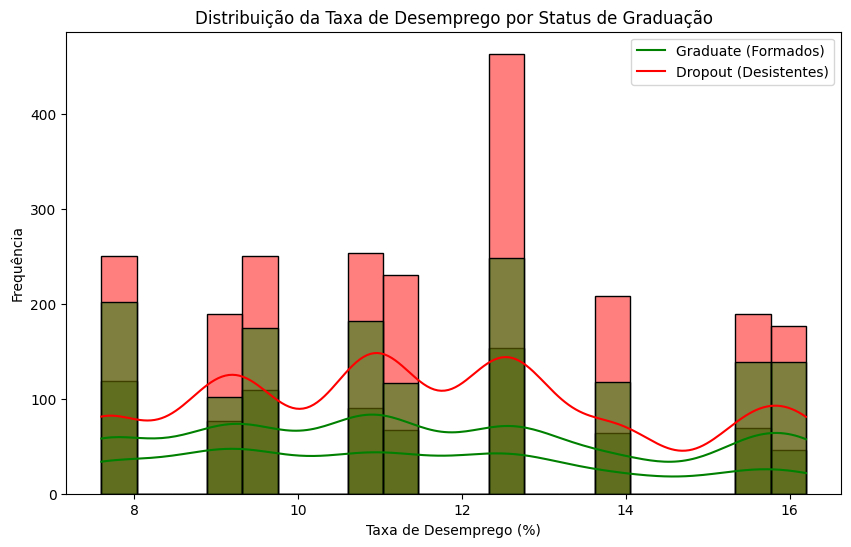


Média da Taxa de Desemprego para Formados: 11.64%
Média da Taxa de Desemprego para Desistentes: 11.62%


In [11]:
# Visualizando a distribuição da taxa de desemprego por grupo
# Biblioteca: Matplotlib | Configuramos a dimensão do gráfico
plt.figure(figsize=(10, 6))

# Biblioteca: Seaborn | Criamos um histograma com densidade sobreposta, separado por grupo
sns.histplot(data=df, x='Unemployment rate', hue='Target', kde=True, palette=['green', 'red'], bins=20)

# Biblioteca: Matplotlib | Adicionamos título e rótulos ao gráfico
plt.title('Distribuição da Taxa de Desemprego por Status de Graduação')
plt.xlabel('Taxa de Desemprego (%)')
plt.ylabel('Frequência')

# Biblioteca: Matplotlib | Exibimos a legenda com os dois grupos (Formados e Desistentes)
plt.legend(['Graduate (Formados)', 'Dropout (Desistentes)'])

# Biblioteca: Matplotlib | Exibimos o gráfico gerado
plt.show()

# Calculando a média da Taxa de Desemprego por grupo
# Biblioteca: Pandas | Aqui calculamos a média da taxa de desemprego para os alunos Formados
graduate_unemployment_mean = df[df['Target'] == 'Graduate']['Unemployment rate'].mean()
# Biblioteca: Pandas | Aqui calculamos a média da taxa de desemprego para os alunos Desistentes
dropout_unemployment_mean = df[df['Target'] == 'Dropout']['Unemployment rate'].mean()

# Exibir os resultados
# Aqui imprimimos as médias calculadas para cada grupo com as traduções incluídas
print(f"\nMédia da Taxa de Desemprego para Formados: {graduate_unemployment_mean:.2f}%")
print(f"Média da Taxa de Desemprego para Desistentes: {dropout_unemployment_mean:.2f}%")
